# Jupyter Notebooks
The purpose of this page is to explain where jupyter notebooks came from and what it is, as well as to provide a couple of code examples.

## Jupyter Notebook is the continuation of IPython Notebook
Jupyter Notebook is the continuation of the IPython Notebook project. IPython  was originally created in 2001 by Fernando Perez. It was designed to be a better coding environment than the default interpreter that is provided with python. The default interpreter allows users to enter in code and test ideas without the need to create test files or scripts. The IPython environment adds additional features including: an enhanced python shell, a many clients to one kernel relatioship, and support for parallel computing. Jupyter was created by Fernando in 2014 as a spin-off project of IPython. Essentially, IPython is maintained for its python shell, which is used in Jupyter, and the other languages that got their start in IPython moved to Jupyter. the name for jupyter notebooks was created to refer to three of the supported languages: JUlia, PYthon, and R.

## Jupyter Helps Data Scientists
Jupyter was designed for sharing and collaborating ideas. A notebook is meant to be viewed interactively, and this can be done in a number of ways. If the created has access to a server that runs the jupyter software, they can host their notebook there where it can be access via a web url, like a website. Docker, or other container software images can be shared with users so that they can view a dynamic personal copy of the notebook. Notebooks can also be view statically on github or through nbviewer. The my binder project displays notebooks in statically by creating docker images of github repositories. 

Notebook pages are made up of cells, which be one of three types: raw data, markdown, and code. When you are viewing a notebook, the last active cell will have a border around it that will either be blue or green. The color indicates whether the cell is in command mode (blue) or edit mode (green). The command and edit modes are similar to software like the vi or vim text editor, where the keyboard will behave differently depending the mode. 

More about the Jupyter notebooks UI can be learned from http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb#Modal-editor

## Code Examples

### Variable and Print output

Here is a simple example of python code using variables and the print function

In [22]:
name = "Guido" # Python was created by Guido van Rossum in 1991

Feel free to change the name...

In [23]:
print("Hello, World!\nMy Name is", name)

Hello, World!
My Name is Guido


Notice the `In [ ]:` located next to the code cells. The characters contained within the square brackets will indicate the run state of the cell. A `*` indicates the code is still running, and a number will indicate the order the cells where run in. Hovering over a code cell causes the run symbol to appear. By clicking this symbol, you can run the cell and a new number will appear indicating the run order. Try it out above!

On to some more complex examples

---
### Finding a Convex Hull (Quick Hull method)

A convex hull is the minimum convex enclosure of a set of points. It is a common problem in computational geometry is used in several disciplines including:
 * pattern recognition
 * image processing
 * game theory

A common visualization technique is to think of stretching a rubber band around a group of nails or thumb tacks.
![alt text]( ./thumbtacks_sm.png "Convex Hull Thumbtack example")
You can see there are points that make up the hull, and then some points that are just enclosed by the hull.

A number of algorithms exist which are designed to find the convex hull of a set of points. The quick hull method uses a divide and conquer approach similar to the [merge sort algorithm](https://algs4.cs.princeton.edu/22mergesort/). This means it will divide the main problem into smaller and smaller subproblems. It will then solve each of the subproblems and combine or merge the solutions. 

Before we can begin, we will need to generate some random points on a 2D plane. We can do this with the numpy module and plot the points with pyplot from matplotlib to see them.

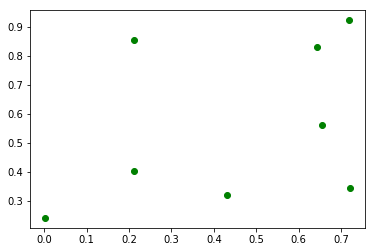

In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt 

num_of_points = 8

points = np.random.rand(num_of_points, 2)
points = points[points[:,0].argsort()] # sorting the points by the x coordinate will make it easier to divide the points into subproblems

plt.plot(points[:,0], points[:,1], 'go')
plt.show()

Next, we will need to decide on a way to divide the points up into increasingly smaller groups, such that the smallest group contains points, and then merge those groups. Essentially this will employ a recursive algorithm, or one that continues to call itself until some base case is satisfied and then apply a clever solution to keep the shape concave. 

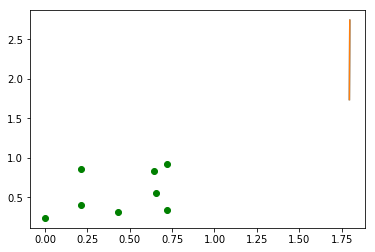

In [3]:
def find_y_int(left_point, right_point, center_line):
    """Finds the equation of a line defined by left_point and right_point and returns the y intercept at x=center_line"""
    m = (left_point[1] - right_point[1])/(left_point[0] - right_point[0])
    b = left_point[1] - m*left_point[0]
    y = m*center_line + b
    return y

def tick_counter_clockwise(hull, origin):
    """Returns the next point on hull counter clockwise from origin"""
    q1 = []
    q2 = []
    q3 = []
    q4 = []
    cclockwise = []
    
    mid_x = (min(hull[:,0]) + max(hull[:,0]))/2
    mid_y = (min(hull[:,1]) + max(hull[:,1]))/2
    for i in range(len(hull)):
        if hull[i,0] >= mid_x:
            if hull[i,1] >= mid_y:
                q1.append(hull[i])
            elif hull[i,1] < mid_y:
                q4.append(hull[i])
        elif hull[i,0] < mid_x:
            if hull[i,1] >= mid_y:
                q2.append(hull[i])
            elif hull[i,1] < mid_y:
                q3.append(hull[i])
    
#     cclockwise = q4[::-1] + q3[::-1] + q2 + q1
    cclockwise = q2[::-1] + q3 + q4 + q1[::-1]
#     tick_pos = cclockwise.index(origin)-1 
    
#     return tick_pos
    return np.asarray(cclockwise)

def tick_clockwise(hull, origin):
    """Returns the next point on hull clockwise from origin"""
    q1 = []
    q2 = []
    q3 = []
    q4 = []
    clockwise = []
    
    mid_x = (min(hull[:,0]) + max(hull[:,0]))/2
    mid_y = (min(hull[:,1]) + max(hull[:,1]))/2
    for i in range(len(hull)):
        if hull[i,0] >= mid_x:
            if hull[i,1] >= mid_y:
                q1.append(hull[i])
            elif hull[i,1] < mid_y:
                q4.append(hull[i])
        elif hull[i,0] < mid_x:
            if hull[i,1] >= mid_y:
                q2.append(hull[i])
            elif hull[i,1] < mid_y:
                q3.append(hull[i])
                
#     clockwise = q1[::-1] + q2[::-1] + q3 + q4
    clockwise = q1 + q4[::-1] + q3[::-1] + q2
#     tick_pos = clockwise.index(origin)+1
#     if tick_pos > len(clockwise):
#         tick_pos = 0
    
#     return clockwise[tick_pos]
    return np.asarray(clockwise)

def merge_hulls(left_hull, right_hull, center_line):
    """Merges left_hull and right_hull and returns the combined hull"""
    
    yint = find_y_int(left_hull[-1], right_hull[0], center_line)
    
    # I could not find a proper solution in time so I've modified  both of the tick functions to 
    # return their calculate hulls and I stick the left half of the left hull with the right half of the right hull...
    
    left_hull = tick_counter_clockwise(left_hull, left_hull[-1])
    
    right_hull = tick_clockwise(right_hull, right_hull[0])
    
    return left_hull + right_hull

def find_center(left_points, right_points):
    """Returns the center x-value (average) between left_points and right_points"""
    rightmost_left = max(left_points[:,0])
    leftmost_right = min(right_points[:,0])
    
    center = (rightmost_left + leftmost_right)/2
    return center

def split_points(n_points, points):
    """Recursively divides points into smaller groups and then solves the atomic groups up to return a convex hull"""
#     print ("Split_points called with n_points:{0}, point_arr:\n{1}\n".format(n_points, points))
    if n_points > 2:
        left = split_points(len(points[0:int(n_points/2)]), points[0:int(n_points/2)])
        right = split_points(len(points[int(n_points/2):]), points[int(n_points/2):])
        center = find_center(left, right)

        return merge_hulls(left, right, center)
    else:
        return points
    
def quick_hull(hull_points):
    """Main function for quick hull, returns convex hull for hull_points"""
    return split_points(len(hull_points), hull_points)

hull = quick_hull(points)

plt.plot(points[:,0], points[:,1], 'go')
for p in list(range(len(hull)-1)):
    x, y = [hull[p,0], hull[p+1,0]], [hull[p,1], hull[p+1,1]]
    plt.plot(x, y, '-')
x, y = [hull[-1,0], hull[0,0]], [hull[-1,1], hull[0,1]]
plt.plot(x, y, '-')

## Well, that did not work

Since I am unable to find a solution to the quick hull algorithm, lets try an easier approach. Where Quickhull generally solves a convex hull in $O(n\ log\ n)$ time (under the best circumstances), the gift wrapping algorithm can solve it in slightly worse $O(nh)$. (time complexity is shown in big O notation)

Again, we will need to start with some points

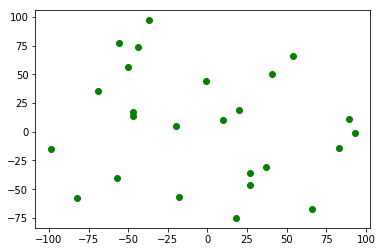

In [4]:
%matplotlib inline

import random

def gen_points(number_points):
    points = [[random.randint(-100, 100), random.randint(-100, 100)] for x in range(number_points)]
    points = sorted(points, key=lambda x: [x[0], x[1]])
    return points

num_of_points = 25

points = gen_points(num_of_points)
for x in points:
    plt.plot(x[0], x[1], 'go')
plt.show()

Next we will need to define a function that determines if point $P$ is on the left(counter-clockwise) or right (clockwise) side of line $\overleftrightarrow{QR}$, which we can do with a cross product.

In [5]:
def sidedness(p, q, r):
    return ((r[0] - q[0]) * (p[1]-q[1])) - ((p[0] - q[0]) * (r[1] - q[1]))

assert sidedness ([1,1], [0,0], [2,2]) == 0 # colinear
assert sidedness ([0,-2], [0,0], [1,3]) < 0  # right
assert sidedness ([0,2], [0,0], [1,3]) > 0  # left
assert sidedness ([-1,5], [0,0], [3,-4]) > 0 # left

# we should not get any assertion exceptions

Now we should have everything needed to write the gift wrapping algorithm.

In [6]:
import math

def jarvismarch(A):
    %%time
    start_point = A[0] # define a starting point 
    
    hull = [start_point] # create structure to hold hull points
    collinear = []

    current_point = start_point
    
    while True:
        
        next_point = A[0] # grab a point
        for x in range(1, len(A)):
            if A[x] == current_point:
                continue
            value = sidedness(A[x], current_point,  next_point)
            if (value < 0):
                next_point = A[x]
                collinear = []
            elif (value == 0):
                if abs(math.sqrt((A[x][0]-current_point[0])**2 + (A[x][1]-current_point[1])**2)) > abs(math.sqrt((next_point[0]-current_point[0])**2 + (next_point[1]-current_point[1])**2)):
                    collinear.append(next_point)
                    next_point = A[x]
                else:
                    collinear.append(A[x])
        
        for x in collinear:
            hull.append(x)
        
        if next_point == start_point:
            break
            
        hull.append(next_point)
        current_point = next_point
        
    # scan for points on the right of starting point, current point
    # if one is found, scan for points on the right of starting point and current point
        
    return hull


Now that that is finished, lets display our result

CPU times: user 12 µs, sys: 2 µs, total: 14 µs
Wall time: 24.6 µs


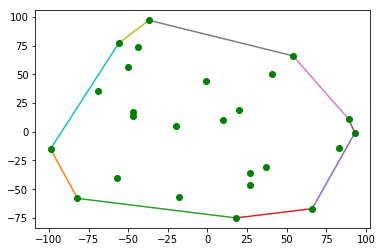

In [7]:
from matplotlib import pyplot as plt 

hull = jarvismarch(points)

for p in list(range(len(hull)-1)):
    x, y = [hull[p][0], hull[p+1][0]], [hull[p][1], hull[p+1][1]]
    plt.plot(x, y, '-')
x, y = [hull[-1][0], hull[0][0]], [hull[-1][1], hull[0][1]]
plt.plot(x, y, '-')

for x in points:
    plt.plot(x[0], x[1], 'go')
plt.show()

---
### Finding a Convex Hull (using spatial package from scipy)
This coding example can be found in the spatial documentation on scipy's website: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html

First, load the modules

In [8]:
from scipy.spatial import ConvexHull
from ipywidgets import widgets
from ipywidgets import interact
import numpy as np
from matplotlib import pyplot as plt 

In [9]:
plane_points = 25 # this will initialize our default point quantity

This next cell will solve the hull, plot the points, and plot the hull. We will also use the IPython magic statement `%%time` which will time the find_hull funciton. I have also created a slider so the point quantity can be adjusted interactively. 

CPU times: user 13 µs, sys: 1 µs, total: 14 µs
Wall time: 27.4 µs


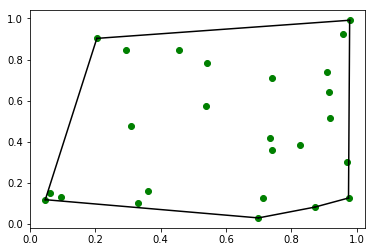

In [10]:
%matplotlib inline

def find_hull(plane_points):
    %%time
    points = np.random.rand(plane_points, 2)   # generate random points in 2-D
    
    hull = ConvexHull(points)
    plt.plot(points[:,0], points[:,1], 'go') # the g in go indicates green and the o means dots
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-') # k- means a black line

interact(find_hull, plane_points=widgets.IntSlider(min=3,max=500,step=1,value=plane_points, continuous_update=False));

## Conclusion of Page 1
This has been a short explanation of what a Jupyter Notebook is, and what a page from one looks like. 